In [1]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
ans=[0]*5

In [2]:
#Import the dataset and define the feature as well as the target datasets / columns 
df = pd.read_csv('zoo.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#We drop the animal names since this is not a good feature to split the data on. 
X.drop(columns= ['animal_name'],inplace=True)

In [3]:
#Write a function to find the entropy on a split "target_col"
import math
def entropy(target_col):
  H = 0
  d_feat = dict(zip(target_col.value_counts().index,target_col.value_counts().values))
  total_freq = sum(d_feat.values())
  for key,freq in d_feat.items():
    p = (freq/total_freq)
    H-= p*math.log2(p) 
  return H


In [4]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
for f in feature_names:
  print("entropy for "+f+" = "+str(entropy(df[f])))

entropy for hair = 0.9840304711717018
entropy for feathers = 0.7179499765002912
entropy for eggs = 0.9794662187017297
entropy for milk = 0.9743197211096903
entropy for airborne = 0.7910662980902585
entropy for aquatic = 0.9396846718728562
entropy for predator = 0.9914266810680206
entropy for toothed = 0.9685867165455516
entropy for backbone = 0.6761627418829198
entropy for breathes = 0.7374895672137456
entropy for venomous = 0.3993820824245975
entropy for fins = 0.653839880626333
entropy for legs = 2.0338113440641234
entropy for tail = 0.8228368841492257
entropy for domestic = 0.5538976334852962
entropy for catsize = 0.9880162151534645


In [5]:
#Find the entropy of the feature "toothed"

ans[0]= entropy(df['toothed'])

In [6]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class_type"):       
    #Calculate the entropy of the total dataset  
    H_s = entropy(data[target_name])
    #Calculate the values and the corresponding counts for the split attribute   
    d_split_attribute = dict(zip(data[split_attribute_name].value_counts().index,data[split_attribute_name].value_counts().values))
    #Calculate the weighted entropy  
    count_sum = sum(d_split_attribute.values())
    H_weighted = np.sum([(count/count_sum) * entropy(data.where(data[split_attribute_name]==value)[target_name]) for value,count in d_split_attribute.items()])
    #Calculate the information gain  
    IG = H_s - H_weighted
    return IG

In [7]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
...
ans[1]=InfoGain(df,'hair','milk')

In [8]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
target_features = list(df.columns)
target_features.remove('milk')
for tf in target_features:
  print("InfoGain for split on milk having target feature "+tf+" = "+str(InfoGain(df,'milk',tf)))

InfoGain for split on milk having target feature animal_name = 0.9743197211096764
InfoGain for split on milk having target feature hair = 0.6599660577558698
InfoGain for split on milk having target feature feathers = 0.17242769884415887
InfoGain for split on milk having target feature eggs = 0.7870598185734241
InfoGain for split on milk having target feature airborne = 0.11370352314621812
InfoGain for split on milk having target feature aquatic = 0.10181386403185944
InfoGain for split on milk having target feature predator = 0.0006367772440212249
InfoGain for split on milk having target feature toothed = 0.3465412540071714
InfoGain for split on milk having target feature backbone = 0.15262359382508262
InfoGain for split on milk having target feature breathes = 0.18259765312929543
InfoGain for split on milk having target feature venomous = 0.06284178150207947
InfoGain for split on milk having target feature fins = 0.018672543666944375
InfoGain for split on milk having target feature leg

In [9]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

In [10]:
#Fit the given data
cls = DecisionTreeClassifier()
cls.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
#Make a prediction on the test data and return the percentage of accuracy
from sklearn.metrics import accuracy_score
y_pred = cls.predict(X_test)
acc = accuracy_score(y_test,y_pred)
ans[2]= acc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


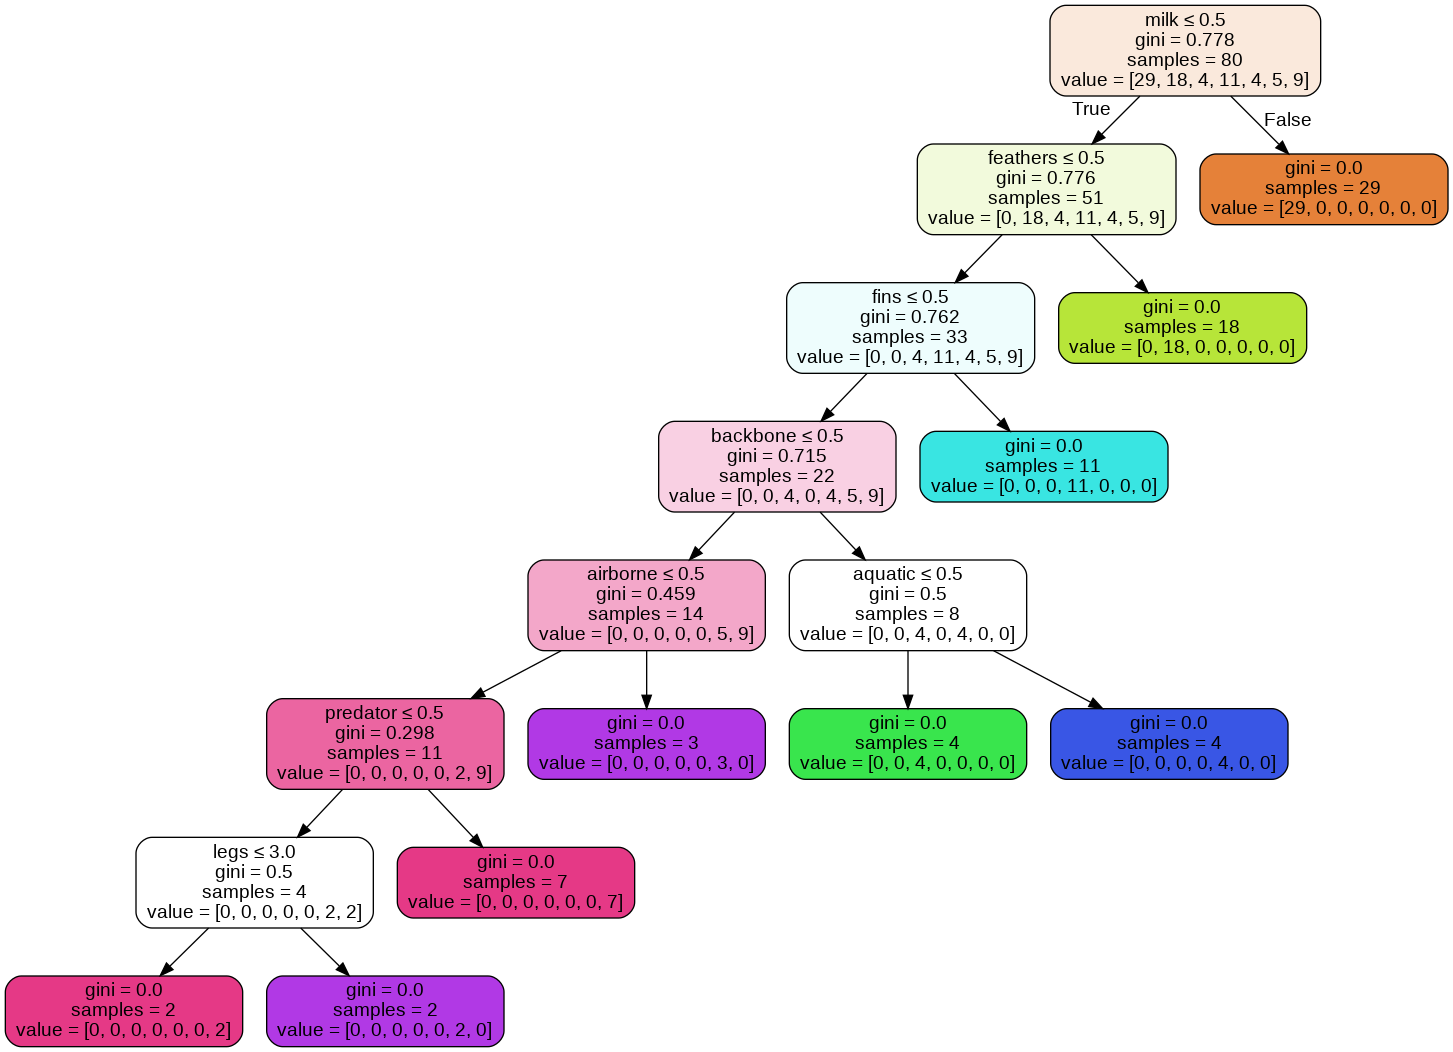

In [12]:
#Run this cell to visualize the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(cls, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report")
print(classification_report(y_test,y_pred))
print("--"*20)
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21

----------------------------------------
confusion matrix
[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#Find the recall,f1-score for class type '3'
from sklearn.metrics import recall_score,f1_score
recal = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
ans[3]= [recal, f1]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
mae = np.mean(np.absolute(y_test-y_pred))
mse = np.mean(np.square(y_test-y_pred))
rmse = np.sqrt(mse)
print(mae,mse,rmse)

0.09523809523809523 0.19047619047619047 0.4364357804719847


In [16]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4]= [mae,rmse]

In [17]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "Group47_mansinumber1@gmail.com_Mansi_Uniyal_DecisionTrees"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [18]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'Group47_mansinumber1@gmail.com_Mansi_Uniyal_DecisionTrees',
 'status': 'Success'}


In [19]:
ans

['0.9685867165455516',
 '0.6599660577558698',
 '0.9523809523809523',
 '[0.7142857142857143, 0.7142857142857143]',
 '[0.09523809523809523, 0.4364357804719847]']